Daniel Fredrick Genesio - Universitas Indonesia

# Business Questions Example



*   Apa karakteristik dari suatu halaman yang memiliki Bounce Rate yang tinggi?
*   Diantara jenis-jenis source/medium, berapa persenkah halaman yang memiliki engagement yang baik, dimana suatu halaman harus memiliki bounce rate yang dibawah rata-rata atau page views per session dan average time on page yang diatas rata-rata.



# Import Library

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Data Wrangling

In [28]:
df = pd.read_csv('/content/Assignment Data Analyst MSIB Batch 7 - Sheet1.csv')
df.head()

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233


## Assessing Data

In [29]:
print("""
==========info==========
""")
print(df.info())
print("""
==========Data null==========
""")
print(df.isnull().sum())
print("""
=====Statistik Data=====
""")
print(df.describe(include = 'all'))
print("""
=====Jumlah data terduplikasi=====
""")
print("Jumlah Duplikasi: ",df.duplicated().sum())


==========info==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ga:sourceMedium         156 non-null    object 
 1   ga:pageTitle            156 non-null    object 
 2   ga:users                155 non-null    float64
 3   ga:bounceRate           155 non-null    float64
 4   ga:pageviews            155 non-null    float64
 5   ga:pageviewsPerSession  155 non-null    float64
 6   ga:avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB
None

==========Data null==========

ga:sourceMedium           0
ga:pageTitle              0
ga:users                  1
ga:bounceRate             1
ga:pageviews              1
ga:pageviewsPerSession    1
ga:avgTimeOnPage          1
dtype: int64

=====Statistik Data=====

       ga:sourceMedium                                       ga:pag

## Cleaning Data

In [30]:
df = df.dropna()
print("""
==========Data null==========
""")
print(df.isnull().sum())
#kolom terakhir dihapus karna tidak memiliki data apapun


==========Data null==========

ga:sourceMedium           0
ga:pageTitle              0
ga:users                  0
ga:bounceRate             0
ga:pageviews              0
ga:pageviewsPerSession    0
ga:avgTimeOnPage          0
dtype: int64


# Exploratory Data Analysis (EDA)

In [31]:
meanpersource = df.groupby(['ga:sourceMedium']).agg({
    'ga:bounceRate':'mean',
    'ga:pageviewsPerSession': 'mean',
    'ga:avgTimeOnPage':'mean'}).reset_index()

print(meanpersource)

  ga:sourceMedium  ga:bounceRate  ga:pageviewsPerSession  ga:avgTimeOnPage
0  facebook / cpc      31.852615               16.513886         75.624879
1    google / cpc      34.126984                6.916226         69.532704


Disini dihitung rata-rata dari kolom yang ingin dianalisis lebih lanjut untuk setiap source/medium

In [32]:
meanpersource.columns = ['ga:sourceMedium','avg bounce rate per source',
                         'avg pageviews per session per source',
                         'avg time on page per source']

merged = pd.merge(df,meanpersource,on='ga:sourceMedium',how='left')
merged.head()

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage,avg bounce rate per source,avg pageviews per session per source,avg time on page per source
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189,31.852615,16.513886,75.624879
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553,31.852615,16.513886,75.624879
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338,31.852615,16.513886,75.624879
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397,31.852615,16.513886,75.624879
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233,31.852615,16.513886,75.624879


menggabungkan nilai rata-rata yang dijelaskan sebelumnya ke dataset awal, nilai ini nantinya akan dijadikan pembanding

In [33]:
merged['bounce rate category']= merged.apply(lambda x: 'above average' if x['ga:bounceRate']>x['avg bounce rate per source'] else 'below average',
                                             axis =1)
merged['page views per session category']= merged.apply(lambda x: 'above average' if x['ga:pageviewsPerSession']>x['avg pageviews per session per source'] else 'below average',
                                             axis =1)
merged['time on page category']= merged.apply(lambda x: 'above average' if x['ga:avgTimeOnPage']>x['avg time on page per source'] else 'below average',
                                             axis =1)
merged.head()

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage,avg bounce rate per source,avg pageviews per session per source,avg time on page per source,bounce rate category,page views per session category,time on page category
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189,31.852615,16.513886,75.624879,below average,below average,below average
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553,31.852615,16.513886,75.624879,above average,below average,below average
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338,31.852615,16.513886,75.624879,below average,below average,below average
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397,31.852615,16.513886,75.624879,below average,below average,below average
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233,31.852615,16.513886,75.624879,below average,above average,above average


Disinilah kita membandingkan nilai-nilai rata-rata tersebut dengan nilai-nilai setiap halaman/page title untuk setiap kolomnya yang dijadikan bahan analisis.

In [34]:
merged['engagement quality'] = merged.apply(
    lambda x: 'good engagement'
    if (x['bounce rate category'] == 'below average' or
        x['page views per session category'] == 'above average' and
        x['time on page category'] == 'above average')
    else 'bad engagement',
    axis=1)

merged.head()

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage,avg bounce rate per source,avg pageviews per session per source,avg time on page per source,bounce rate category,page views per session category,time on page category,engagement quality
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189,31.852615,16.513886,75.624879,below average,below average,below average,good engagement
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553,31.852615,16.513886,75.624879,above average,below average,below average,bad engagement
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338,31.852615,16.513886,75.624879,below average,below average,below average,good engagement
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397,31.852615,16.513886,75.624879,below average,below average,below average,good engagement
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233,31.852615,16.513886,75.624879,below average,above average,above average,good engagement


Disini kita akan mulai menjawab pertanyaan kedua, dimana kondisi yang diberikan untuk menilai suatu halaman yang memiliki engagement yang baik adalah bounce rate yang dibawah rata-rata atau page views per session dan average time on page yang diatas rata-rata.

In [40]:
merged['engagement quality boolean'] = merged['engagement quality'] == 'good engagement'
good_engagement_sum = merged.groupby('ga:sourceMedium')['engagement quality boolean'].sum().reset_index(name='count')

print(good_engagement_sum)

  ga:sourceMedium  count
0  facebook / cpc     97
1    google / cpc      4


Menghitung jumlah halaman/page yang memilki engagement yang baik untuk setiap source/mediumnya

In [39]:
engagement_sum = merged.groupby(['ga:sourceMedium']).size().reset_index(name='count')

print(engagement_sum)

  ga:sourceMedium  count
0  facebook / cpc    150
1    google / cpc      5


Menghitung jumlah halaman/page untuk setiap source/mediumnya

# Data Visualization

In [50]:
df['page view per(user vs session)'] = (df['ga:pageviews'] / df['ga:users']) - df['ga:pageviewsPerSession']
numeric_df = df[['ga:users', 'ga:bounceRate', 'ga:pageviews', 'ga:pageviewsPerSession', 'ga:avgTimeOnPage', 'page view per(user vs session)']]
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)


Disini, saya berasumsi bahwa perbedaan kecil antara page view per user dan page view per session disebabkan oleh adanya bounce rate

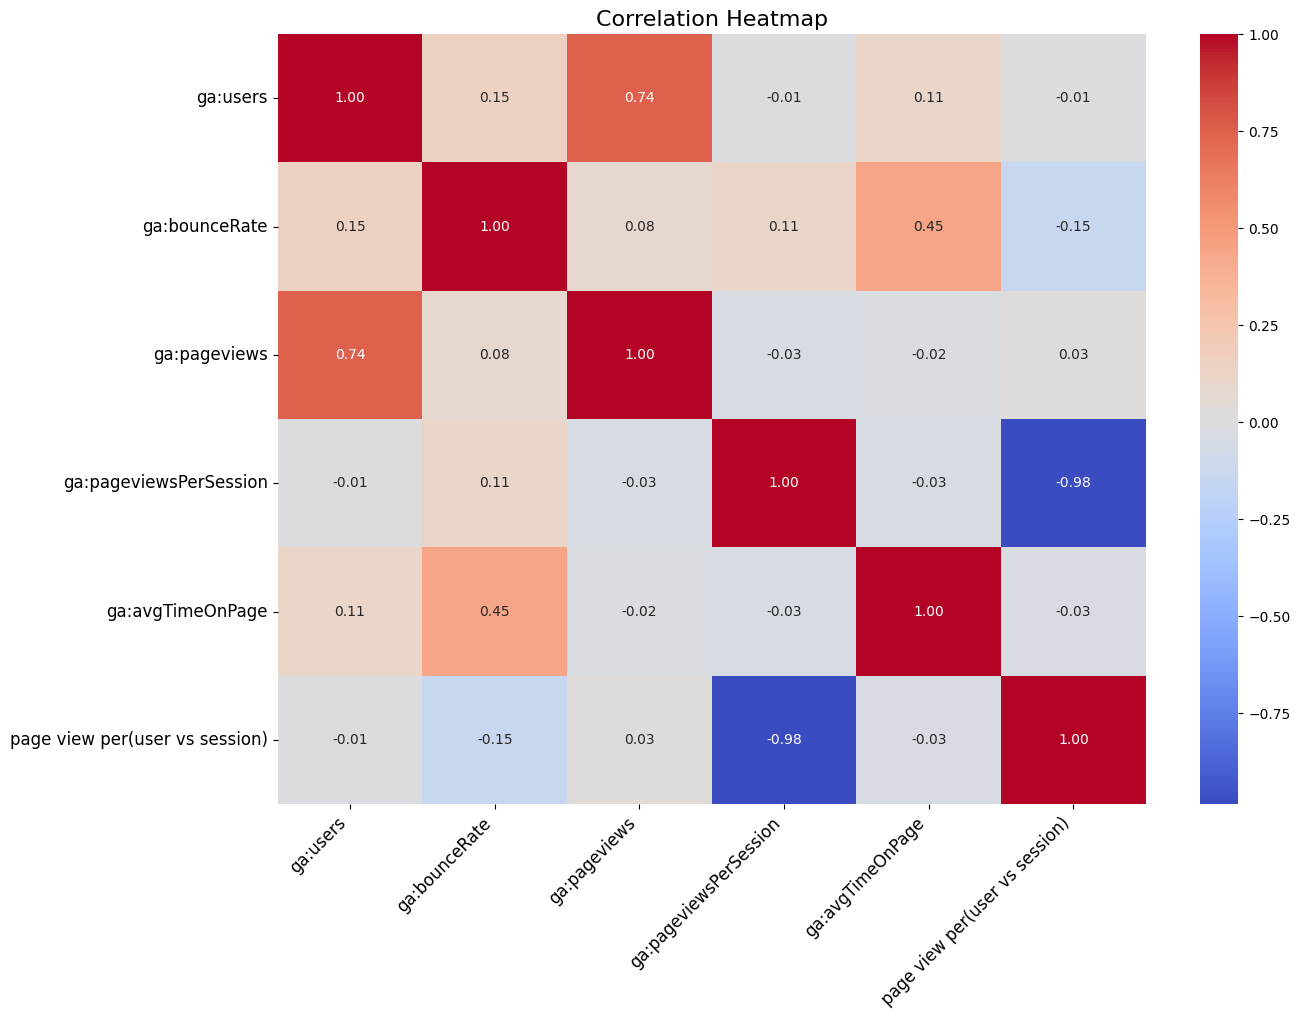

In [51]:
corr = normalized_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

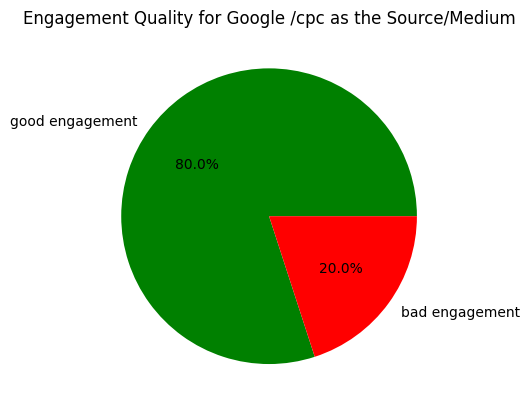

In [55]:
sizes = [good_engagement_sum['count'][1], engagement_sum['count'][1] - good_engagement_sum['count'][1]]
colors = ['green', 'red']
plt.pie(sizes, labels=['good engagement', 'bad engagement'], colors=colors, autopct='%1.1f%%')
plt.title('Engagement Quality for Google /cpc as the Source/Medium')
plt.show()

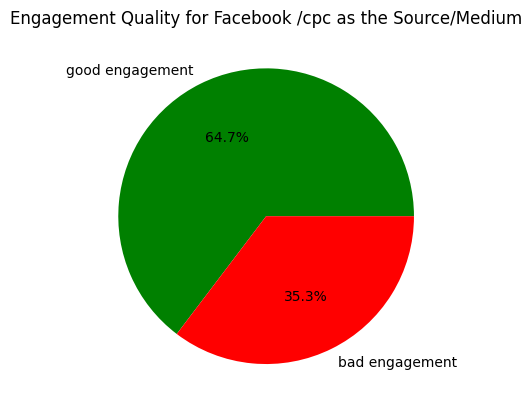

In [56]:
sizes = [good_engagement_sum['count'][0], engagement_sum['count'][0] - good_engagement_sum['count'][0]]
colors = ['green', 'red']
plt.pie(sizes, labels=['good engagement', 'bad engagement'], colors=colors, autopct='%1.1f%%')
plt.title('Engagement Quality for Facebook /cpc as the Source/Medium')
plt.show()

# Kesimpulan



*   Untuk pertanyaan bisnis pertama, dari data yang diberikan, satu-satunya nilai yang memiliki impact yang setidaknya cukup berpengaruh pada bounce rate adalah average time on page, disini menggambarkan bahwa ada kemungkinan bahwa user tidak akan mengunjungi halaman/page lain ketika sudah menghabiskan waktu yang cukup banyak pada suatu halaman/page, tentu saja ini akibat dari minat baca masyarakat yang masih rendah, disini solusi yang bisa diberikan adalah pada halaman yang memilki penjelasan/artikel yang cukup panjang, bisa dibuat lebih menarik bagi pengguna, bisa berikan gambar atau berikan anekdot yang berkaitan
*   Untuk pertanyaan bisnis kedua, disini kita bisa lihat bahwa google/cpc memberikan engangement yang lebih baik kepada penggguna dibandingkan dengan facebook/cpc, seperti yang sudah dijelaskan, engangement disini saya mencoba untuk menilainya berdasarkan bounce rate yang dibawah rata-rata atau page views per session dan average time on page yang diatas rata-rata, disini kita lihat bahwa memang google/cpc memiliki engangement rate yang lebih baik, solusi untuk insight ini adalah, bandingkan tipe pengguna antara google/cpc dan facebook/cpc, sudah pasti tipe pengguna google/cpc dan facebook/cpc berbeda, sebagai contoh facebook/cpc mempunyai label sebagai aplikasi yang banyak digunakan orang tua, jadi page/halaman yang akan diiklankan/dipromosikan di facebook lebih baik memfokuskan pada page/halaman yang sudah diyakini bahwa akan lebih menarik bagi para orang tua, dan lakukan hal yang sama untuk page/halaman yang akan dipromosikan di google, jadi dengan menganalisis target pasar lebih lanjut, nantinya akan bisa mengoptimalkan promotion cost.

